In [87]:
%run ./Functions_PM.ipynb

# m_1 = 10*M_sun
# m_2 = 10*M_sun
# R_S = 2*(m_1 + m_2)*G/c**2
# x_1 = np.array([-100., -10.])*R_S
# x_2 = np.array([0.,      0.])*R_S
# v_1 = np.array([0.,     0.07])*c
# v_2 = np.array([0.,      0.])*c

m_1 = 1e-9*M_sun
m_2 = M_sun
R_S = 2*(m_1 + m_2)*G/c**2
x_1 = np.array([10.,    0.])*R_S
x_2 = np.array([0.,      0])*R_S
v_1 = np.array([-0.25, 0.2])*c
v_2 = np.array([0.,      0])*c

s = x_1, x_2, v_1, v_2, m_1, m_2

In [88]:
t_max = 1e5*R_S/c
dt = t_max/1e5
pos1, pos2, pos_CM = run_model(s, t_max = t_max, dt = dt, mode = 'PM')




C:\Users\Productivity\AppData\Local\Temp\ipykernel_15204\32904894.py:72: RuntimeWarning: overflow encountered in double_scalars
  a_1 = - G/r**2 * ( (m_1*m_2)**2 - 2*(E_1 * E_2 + p**2)**2 )/(E_1*E_2)* ( 1/E_1 + 1/E_2 - p_r**2/E_1**3 - p_r**2/E_2**3 + G/r*2*p_r/(E_1*E_2) * ( ( -2/p_r + p_r * ( 1/E_1**2 + 1/E_2**2 ) ) * ( E_1**2 + E_2**2 + 4 - p**4 * ( 1/E_1**2 + 1/E_2**2) ) - 4*p_r + 4*p**2*p_r* (1/E_1**2 + 1/E_2**2) + 2*p**4*p_r * ( 1/E_1**4 + 1/E_2**4 ) ) ) + G/r*2*p_r/(E_1*E_2)*(1/r - 4)
C:\Users\Productivity\AppData\Local\Temp\ipykernel_15204\32904894.py:72: RuntimeWarning: invalid value encountered in double_scalars
  a_1 = - G/r**2 * ( (m_1*m_2)**2 - 2*(E_1 * E_2 + p**2)**2 )/(E_1*E_2)* ( 1/E_1 + 1/E_2 - p_r**2/E_1**3 - p_r**2/E_2**3 + G/r*2*p_r/(E_1*E_2) * ( ( -2/p_r + p_r * ( 1/E_1**2 + 1/E_2**2 ) ) * ( E_1**2 + E_2**2 + 4 - p**4 * ( 1/E_1**2 + 1/E_2**2) ) - 4*p_r + 4*p**2*p_r* (1/E_1**2 + 1/E_2**2) + 2*p**4*p_r * ( 1/E_1**4 + 1/E_2**4 ) ) ) + G/r*2*p_r/(E_1*E_2)*(1/r - 4)


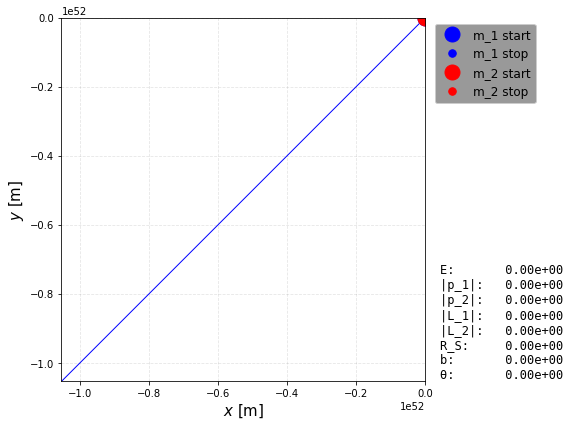

In [86]:

M = slice(0, int(len(pos1[0])), 1)
orbPlotter(pos1[:,M], pos2[:,M], pos_CM[:,M], CM = True)

# lim = 1e6
# lims = (-lim, lim)
# orbPlotter_lims(pos1, pos2, pos_CM, CM = True, xlim=lims, ylim=lims)